In [58]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

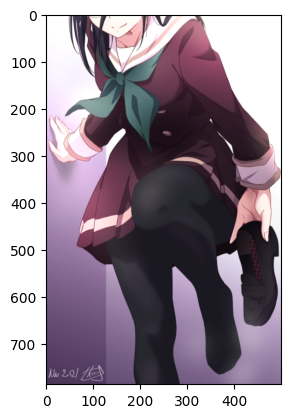

In [76]:
image = cv2.imread("../images/94147214_p0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [77]:
image.shape

(787, 500, 3)

## remap

- map1: 目标图像中的每一个像素都对应于(映射于)原始图像的中的某个像素，将对应的原始图像的像素坐标的col存放在map1中。map1的shape和目标图像一样。
- map2: 目标图像中的每一个像素都对应于(映射于)原始图像的中的某个像素，将对应的原始图像的像素坐标的row存放在map2中。map2的shape和目标图像一样。

In [78]:
# map1 代表 col
# 正常
map1 = np.arange(image.shape[1])
print(map1.shape)
map1 = np.expand_dims(map1, axis=0) + np.zeros(image.shape[:-1])
map1 = map1.astype(np.float32)
print(map1.shape)
map1

(500,)
(787, 500)


array([[  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       ...,
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.],
       [  0.,   1.,   2., ..., 497., 498., 499.]], dtype=float32)

In [79]:
# 左右翻转
map1_r = map1[:, ::-1]
map1_r

array([[499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       ...,
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.],
       [499., 498., 497., ...,   2.,   1.,   0.]], dtype=float32)

In [80]:
# map2 代表 row
# 正常
map2 = np.arange(image.shape[0])
print(map2.shape)
map2 = np.expand_dims(map2, axis=1) + np.zeros(image.shape[:-1])
map2 = map2.astype(np.float32)
print(map2.shape)
map2

(787,)
(787, 500)


array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       ...,
       [784., 784., 784., ..., 784., 784., 784.],
       [785., 785., 785., ..., 785., 785., 785.],
       [786., 786., 786., ..., 786., 786., 786.]], dtype=float32)

In [81]:
map2_r = map2[::-1]
map2_r

array([[786., 786., 786., ..., 786., 786., 786.],
       [785., 785., 785., ..., 785., 785., 785.],
       [784., 784., 784., ..., 784., 784., 784.],
       ...,
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

# normal

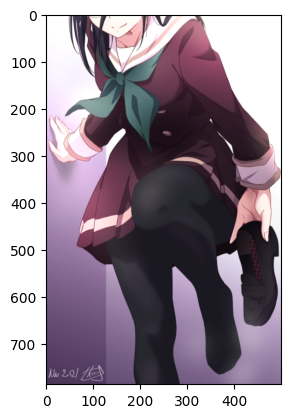

In [82]:
r = cv2.remap(
    src=image,
    map1=map1,
    map2=map2,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

# flip horizontal

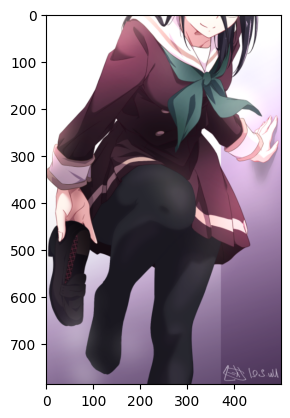

In [83]:
r = cv2.remap(
    src=image,
    map1=map1_r,
    map2=map2,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

# flip vertical

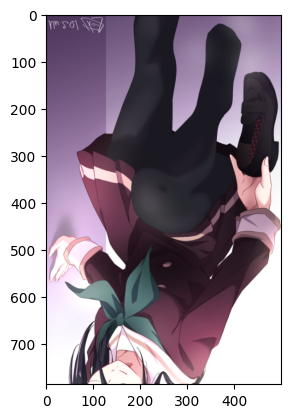

In [84]:
r = cv2.remap(
    src=image,
    map1=map1,
    map2=map2_r,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

# flip horizontal&vertical

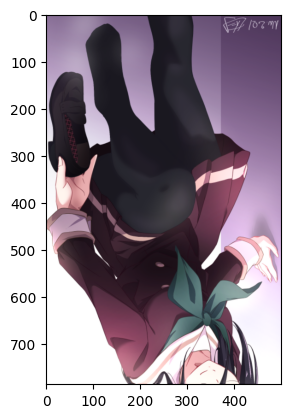

In [85]:
r = cv2.remap(
    src=image,
    map1=map1_r,
    map2=map2_r,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

# move

In [92]:
# 负数没有效果
map1_m = map1 - 50
map1_m

array([[-50., -49., -48., ..., 447., 448., 449.],
       [-50., -49., -48., ..., 447., 448., 449.],
       [-50., -49., -48., ..., 447., 448., 449.],
       ...,
       [-50., -49., -48., ..., 447., 448., 449.],
       [-50., -49., -48., ..., 447., 448., 449.],
       [-50., -49., -48., ..., 447., 448., 449.]], dtype=float32)

In [93]:
# 负数没有效果
map2_m = map2 - 50
map2_m

array([[-50., -50., -50., ..., -50., -50., -50.],
       [-49., -49., -49., ..., -49., -49., -49.],
       [-48., -48., -48., ..., -48., -48., -48.],
       ...,
       [734., 734., 734., ..., 734., 734., 734.],
       [735., 735., 735., ..., 735., 735., 735.],
       [736., 736., 736., ..., 736., 736., 736.]], dtype=float32)

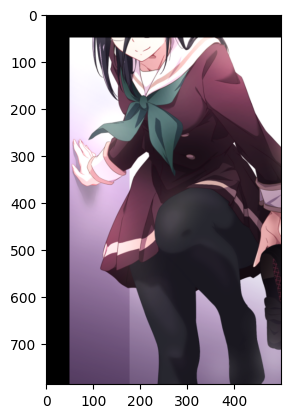

In [94]:
r = cv2.remap(
    src=image,
    map1=map1_m,
    map2=map2_m,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)

## clip限制后 move 会出现拉伸效果

In [99]:
# 负数没有效果
map1_m1 = np.clip(map1_m, a_min=0, a_max=400)
map1_m1

array([[  0.,   0.,   0., ..., 400., 400., 400.],
       [  0.,   0.,   0., ..., 400., 400., 400.],
       [  0.,   0.,   0., ..., 400., 400., 400.],
       ...,
       [  0.,   0.,   0., ..., 400., 400., 400.],
       [  0.,   0.,   0., ..., 400., 400., 400.],
       [  0.,   0.,   0., ..., 400., 400., 400.]], dtype=float32)

In [100]:
# 负数没有效果
map2_m1 = np.clip(map2_m, a_min=0, a_max=700)
map2_m1

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [700., 700., 700., ..., 700., 700., 700.],
       [700., 700., 700., ..., 700., 700., 700.],
       [700., 700., 700., ..., 700., 700., 700.]], dtype=float32)

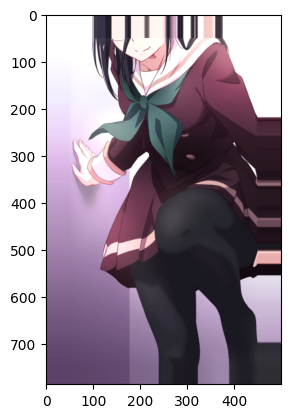

In [101]:
r = cv2.remap(
    src=image,
    map1=map1_m1,
    map2=map2_m1,
    interpolation=cv2.INTER_LINEAR,
    borderMode=cv2.BORDER_CONSTANT,
    borderValue=(0, 0, 0),
)
plt.imshow(r)